In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.plotting import scatterplotmatrix
import seaborn as sb
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.metrics.cluster import completeness_score
import datetime
import math
import plotly.express as px
from sklearn import tree

In [2]:
df = pd.read_csv("C:/Users/Victus/Desktop/flavors_of_cacao.csv", delimiter=',', low_memory=False)
print(df.info())
df = df.dropna()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB
None
     Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                      A. Morin                       Agu

In [3]:
sas1 = [*df['REF'].values]
sas2 = [*df['Review\nDate'].values]
sas4 = [*df['Rating'].values]

<Axes: >

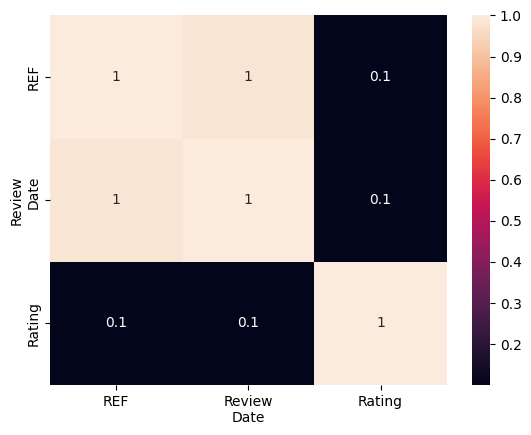

In [4]:
df_new = pd.DataFrame({'REF': sas1, 'Review\nDate': sas2, 'Rating': sas4})
sb.heatmap(df_new.corr(), annot = True, fmt='.1g')

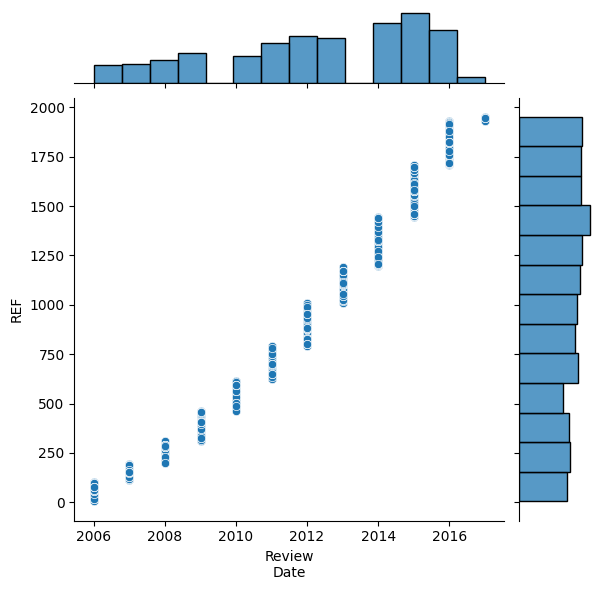

In [5]:
sas1 = [*df['Review\nDate'].values]
sas2 = [*df['REF'].values]
df_new = pd.DataFrame({'Review\nDate': sas1, 'REF': sas2})
sb.jointplot(x='Review\nDate', y='REF', data=df_new, kind='scatter');

<Axes: xlabel='Review\nDate', ylabel='REF'>

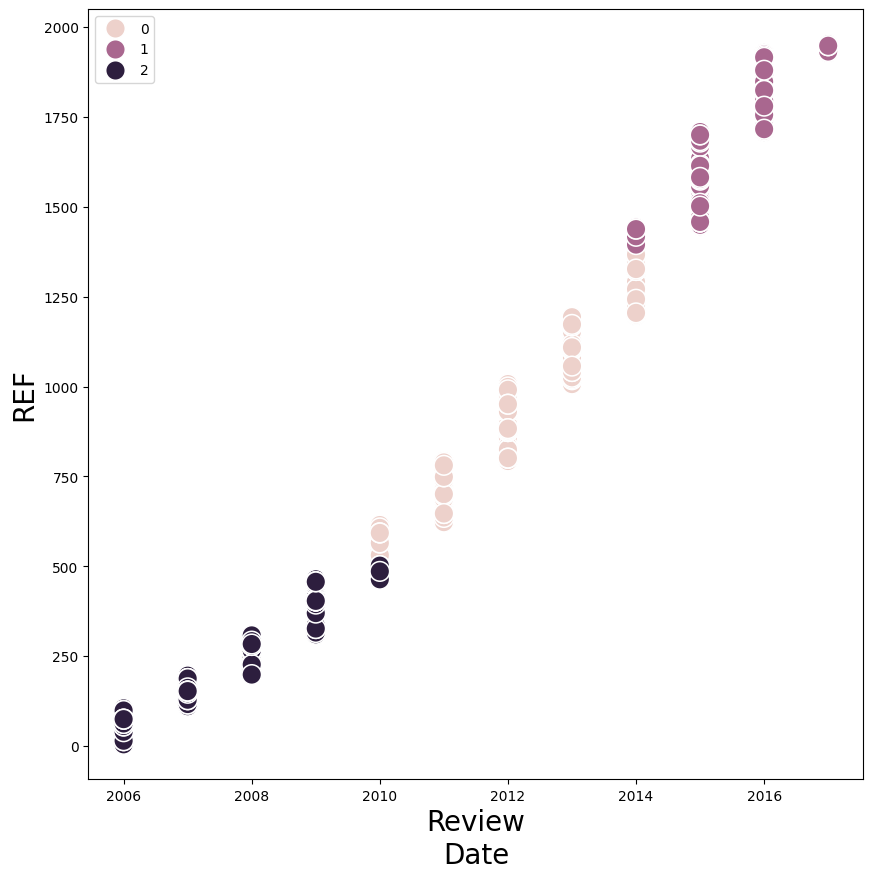

In [6]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
labels = cl.fit_predict(df_new)
plt.figure(figsize=(10,10))
plt.rc('axes', labelsize=20)
sb.color_palette("Paired")
plt.rcParams['scatter.marker'] = 'o'
sb.scatterplot(data=df_new, x='Review\nDate', y='REF', hue=labels, s = 200)

In [7]:
print("Мат Ожидание")
print(df.Rating.mean())
from statistics import variance, pvariance
print("Дисперсия")
variance(df.Rating)

Мат Ожидание
3.185861684327942
Дисперсия


0.22816634692952753

C:\Users\Victus\AppData\Local\Temp\ipykernel_13996\2568352085.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_new, hist=True, kde=True,


<Axes: ylabel='Density'>

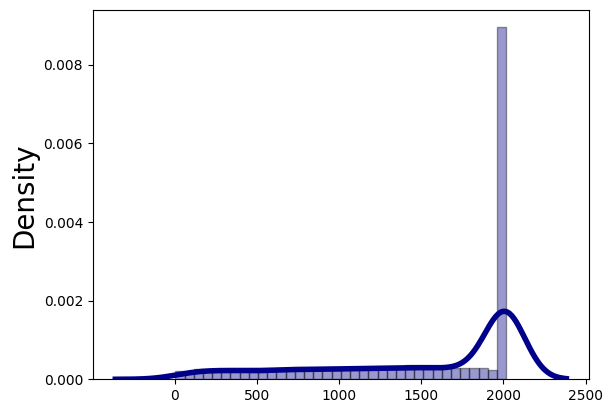

In [22]:
# График плотности и гистограмма всех задержек прибытия
sb.distplot(df_new, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

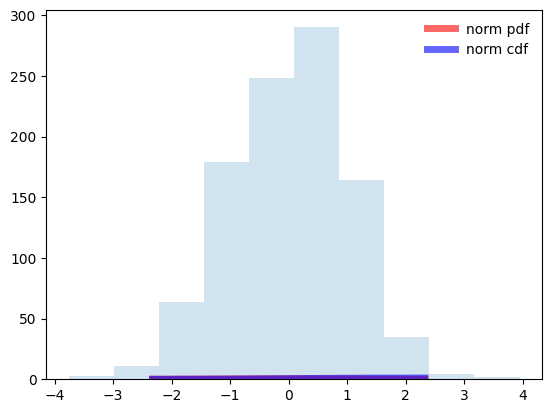

In [9]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
# Calculate a few first moments:
mean, var, skew, kurt = norm.stats(moments='mvsk')
# Display the probability density function (``pdf``):
x = np.linspace(norm.ppf(0.01),  norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, norm.cdf(x),
       'b-', lw=5, alpha=0.6, label='norm cdf')
# Check accuracy of ``cdf`` and ``ppf``:
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
# True
# Generate random numbers:
r = norm.rvs(size=1000)
# And compare the histogram:
ax.hist(r, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
#Графическим способом подбираем законы распределения случайных величин

Математическое ожидание по выборке(общее для сравниваемых распределений) -72.985
СКО по выборке(общее для сравниваемых распределений) -42.572
Энтропийное значение погрешности-87.968


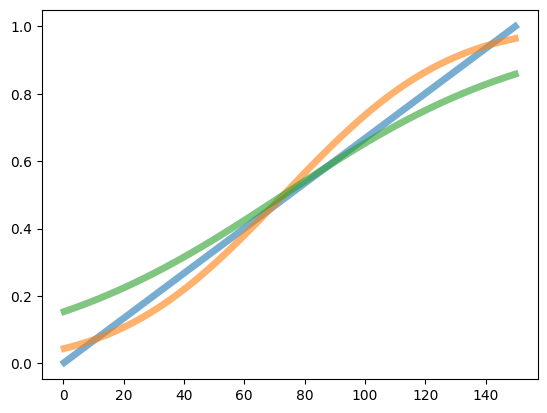

In [10]:
from scipy.stats import logistic,uniform,norm,pearsonr
from numpy import sqrt,pi,e
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
n=1000# объём выборки
x=uniform.rvs(loc=0, scale=150, size=n)#равномерное распределение 
x.sort()#сортировка 
print("Математическое ожидание по выборке(общее для сравниваемых распределений) -%s"%str(round(np.mean(x),3)))
print("СКО по выборке(общее для сравниваемых распределений) -%s"%str(round(np.std(x),3)))
print("Энтропийное значение погрешности-%s"%str(round(np.std(x)*sqrt(np.pi*np.e*0.5),3)))      
pu=uniform.cdf(x/(np.max(x)))#равномерное интегральное  распределение 
ax.plot(x,pu, lw=5, alpha=0.6, label='uniform cdf')
pn=norm.cdf(x, np.mean(x), np.std(x))#нормальное интегральное  распределение 
ax.plot(x,pn, lw=5, alpha=0.6, label='norm cdf')
y_pred = [0, 1, 2, 3, 5, 6, 0, 6, 7, 8, 8]
y_true = [0, 1, 2, 3, 3, 6, 0, 1, 7, 8, 8]
pl=logistic.cdf(x, np.mean(x), np.std(x))# логистическое  интегральное  распределение 
ax.plot(x,pl, lw=5, alpha=0.6, label='logistic cdf')

In [11]:
p=np.arange(0,n,1)/n
ax.plot(x,p, lw=5, alpha=0.6, label='test')
ax.legend(loc='best', frameon=False)
plt.show()
print("Корреляция между нормальным  распределением и тестовым - %s"%str(round(pearsonr(pn,p)[0],3)))
print("Корреляция между логистическим  распределением и тестовым - %s"%str(round(pearsonr(pl,p)[0],3)))
print("Корреляция между равномерным  распределением и тестовым - %s"%str(round(pearsonr(pu,p)[0],3)))
print('Взвешенная сумма  квадратов отклонения нормального распределения от теста -%i'%round(n*sum(((pn-p)/pn)**2)))
print('Взвешенная сумма квадратов отклонения логистического распределения от теста -%i'%round(n*sum(((pl-p)/pl)**2)))
print('Взвешенная сумма квадратов отклонения равномерного распределения от теста -%i'%round(n*sum(((pu-p)/pu)**2))) 

Корреляция между нормальным  распределением и тестовым - 0.995
Корреляция между логистическим  распределением и тестовым - 0.999
Корреляция между равномерным  распределением и тестовым - 1.0
Взвешенная сумма  квадратов отклонения нормального распределения от теста -38993
Взвешенная сумма квадратов отклонения логистического распределения от теста -76154
Взвешенная сумма квадратов отклонения равномерного распределения от теста -4030


In [12]:
# импортируем библиотеки, модули
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [13]:
# функция определения плотности вероятности извлечь деталь, произведенную заданном на станке
# то есть мы задаем параметры станка: мат.ожидание, среднее кв. отклонение
def gaus_func_01(mu,sigma,x):
    return math.e**(-(x-mu)**2/(2*sigma**2)) / (sigma*(2*math.pi)**0.5)

# напишем функцию определения вероятностей принадлежности деталей к станку
def proba_x(X, w1, w2, mu_1, mu_2, sigma_1, sigma_2):
    for i in X:
        P1_x = gaus_func_01(mu_1,sigma_1,i)
        P2_x = gaus_func_01(mu_2,sigma_2,i)
        P_x = w1*P1_x + w2*P2_x
        P_x_1 = (w1*P1_x)/P_x
        P_x_2 = (w2*P2_x)/P_x
        proba_temp = []
        proba_temp.append(P_x_1)
        proba_temp.append(P_x_2)
        proba_X.append(proba_temp)
    return proba_X

# напишем функцию отнесения изделия к тому или станку
def pred_x(proba_X, limit_proba):
    pred_X = []
    for x in proba_X:
        if x[0] >= limit_proba:
            pred_X.append(1)
        else:
            pred_X.append(2)
    return np.array(pred_X)

# напишем функцию построения графиков
def graph_01(X, pred_X, mu_1, sigma_1, mu_2, sigma_2):
    true_pred = []
    false_pred_1 = []
    false_pred_2 = []
    for i in range(X.shape[0]):
        if pred_X[i] == y[i]:
            true_pred.append([X[i], -0.025])
        else:
            if y[i] == 1:
                false_pred_1.append([X[i], -0.0075])
            else:
                false_pred_2.append([X[i], -0.015])

    false_pred_1 = np.array(false_pred_1)            
    false_pred_2 = np.array(false_pred_2)
    true_pred = np.array(true_pred)

    x_theory = np.linspace(42, 85, 20000)
    y_theory_1 = []
    for x in x_theory:
        y_theory_1.append(gaus_func_01(mu_1,sigma_1,x))
    y_theory_2 = []
    for x in x_theory:
        y_theory_2.append(gaus_func_01(mu_2,sigma_2,x))

    plt.figure(figsize=(18, 8))    
    plt.plot(
        x_theory, y_theory_1, color = 'green', lw = 2, label = 'Theoretical probability density for machine 1')
    plt.plot(
        x_theory, y_theory_2, color = 'firebrick', lw = 2, label = 'Theoretical probability density for machine 2')
    plt.hist(
        X[:N1], bins = 'auto', color='#539caf', alpha = 0.35, label = 'machine tool products 1')
    plt.hist(
        X[N1:N], bins = 'auto', color='sandybrown', alpha = 0.75, label = 'machine tool products 2')
    plt.plot(mu_1, 0, 'o', markersize = 11, color = 'blue', label = 'Mu 1')
    plt.plot(mu_2, 0, 'o', markersize = 11, color = 'red', label = 'Mu 2')

    plt.plot([mu_1 - sigma_1, mu_1 - sigma_1], [0,0.85*np.max(y_theory_1)],
             ':', lw = 3, color = 'blue', alpha = 0.55, label = 'Mu1 - sigma1')
    plt.plot([mu_1 + sigma_1, mu_1 + sigma_1], [0,0.85*np.max(y_theory_1)],
             ':', lw = 3, color = 'blue', alpha = 0.55, label = 'Mu1 + sigma1')
    plt.plot([mu_2 - sigma_2, mu_2 - sigma_2], [0,0.85*np.max(y_theory_2)],
             ':', lw = 3, color = 'red', alpha = 0.55, label = 'Mu2 - sigma2')
    plt.plot([mu_2 + sigma_2, mu_2 + sigma_2], [0,0.85*np.max(y_theory_2)],
             ':', lw = 3, color = 'red', alpha = 0.55, label = 'Mu2 + sigma2')

    plt.plot([mu_1 - 2 * sigma_1, mu_1 - 2 * sigma_1], [0, 0.9*0.5 * np.max(y_theory_1)],
             ':', lw = 2.5, color = 'blue', alpha = 0.35, label = 'Mu1 - 2*sigma1')
    plt.plot([mu_1 + 2 * sigma_1, mu_1 + 2 * sigma_1], [0, 0.9*0.5 * np.max(y_theory_1)],
             ':', lw = 2.5, color = 'blue', alpha = 0.35, label = 'Mu1 + 2*sigma1')
    plt.plot([mu_2 - 2 * sigma_2, mu_2 - 2 * sigma_2], [0, 0.9*0.5 * np.max(y_theory_2)],
             ':', lw = 2.5, color = 'red', alpha = 0.35, label = 'Mu2 - 2*sigma2')
    plt.plot([mu_2 + 2 * sigma_2, mu_2 + 2 * sigma_2], [0, 0.9*0.5 * np.max(y_theory_2)],
             ':', lw = 2.5, color = 'red', alpha = 0.35, label = 'Mu2 + 2*sigma2')

    plt.plot(false_pred_1[:,0], false_pred_1[:,1], 'o', markersize = 2.5, color = 'blue', alpha = 0.2, label = 'errors1')
    plt.plot(false_pred_2[:,0], false_pred_2[:,1], 'o', markersize = 2.5, color = 'red', alpha = 0.3, label = 'errors2')
    plt.plot(true_pred[:,0], true_pred[:,1], 'o', markersize = 3, color = 'green', alpha = 0.2, label = 'right answers')

    plt.xlabel('Caliber')
    plt.ylabel('Probability density')
    plt.legend()
    plt.show()

In [14]:
# сформируем начальные условия примера
# количество изделий произведенных на станке №1
N1 = 6000
# количество изделий произведенных на станке №2
N2 = 4000
# количество изделий произведенных на обоих станках
N = N1+N2

# диаметр изделия станка №1
mu_1 = 64.
# стандартное отклонение в размере диаметра изделий станка №1
sigma_1 = 3.5

# диаметр изделия станка №2
mu_2 = 52
# стандартное отклонение в размере диаметра изделий станка №2
sigma_2 = 2.

Доля верно определенных изделий: 0.986

График №1  EM-алгоритм


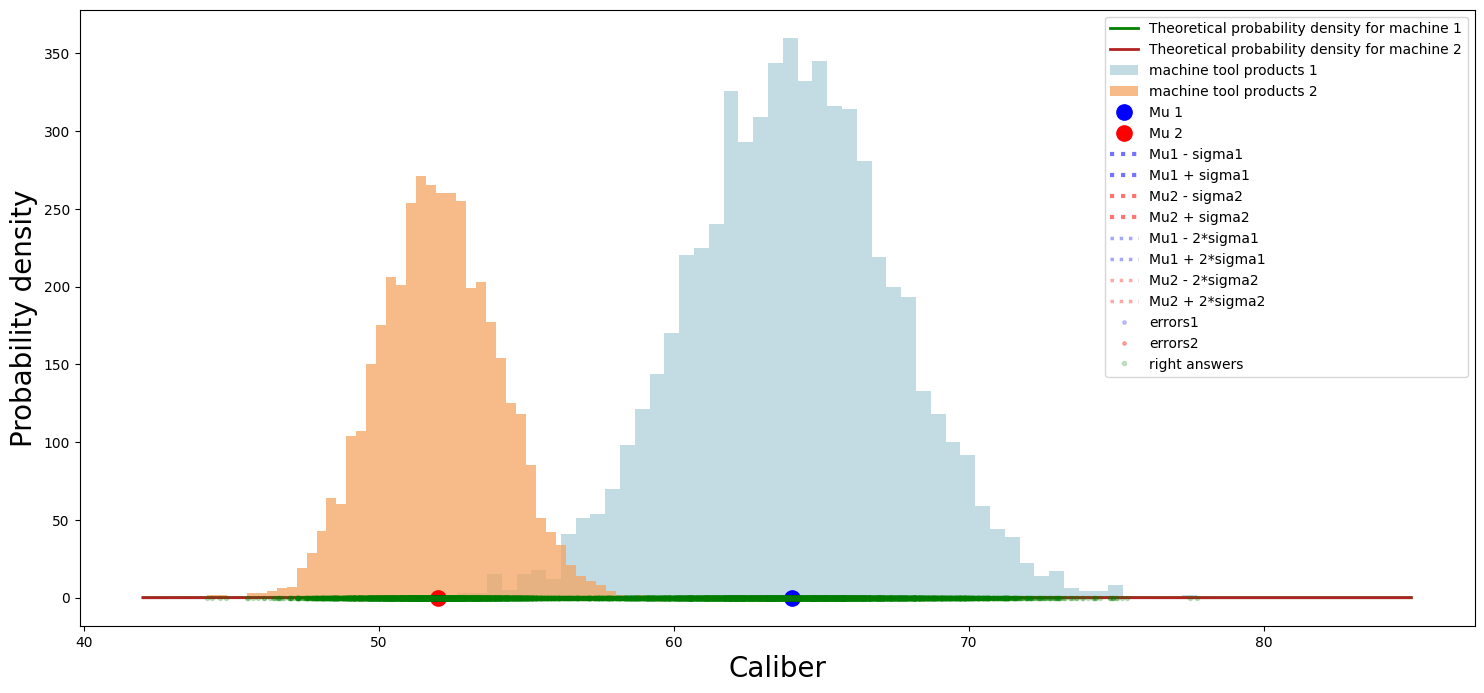

In [15]:
X = np.zeros((N))
np.random.seed(seed=42)
# инициализируем данные по деталям, производства станка №1
X[:N1] = np.random.normal(loc=mu_1, scale=sigma_1, size=N1)
# инициализируем детали, производства станка №2
X[N1:N] = np.random.normal(loc=mu_2, scale=sigma_2, size=N2)

# инициализируем вектор ответов
y = np.zeros((N))
y[:N1] = np.array((1))
y[N1:N] = np.array((2))

# определим априорную вероятность извлечь изделие, произведенное на станке №1
w1 = float(N1)/N
# определим априорную вероятность извлечь изделие, произведенное на станке №2
w2 = float(N2)/N

# для каждой детали определим вероятность принадлежности к тому или иному станку
proba_X = []
proba_X = proba_x(X, w1, w2, mu_1, mu_2, sigma_1, sigma_2)

# установим порог вероятности, при достижении которого, изделие будет относиться к тому или иному станку
limit_proba = 0.5

# определим принадлежность детали к станку
pred_X = []
pred_X = pred_x(proba_X, limit_proba)

# определим качество нашего алгоритма
print('Доля верно определенных результатов:', round(accuracy_score(y, pred_X),3))
print()

print('График №1  EM-алгоритм')
graph_01(X, pred_X, mu_1, sigma_1, mu_2, sigma_2)
#Классификатор ЕМ-алгоритм

In [16]:
import sklearn.metrics
import numpy
cla = AgglomerativeClustering(n_clusters=3, linkage = 'complete')
labels1 = cla.fit_predict(df_new)
r = sklearn.metrics.confusion_matrix(labels1, labels)
r = numpy.flip(r)
print(r)

[[403   0   0]
 [  0 579  82]
 [  7   0 722]]


In [17]:
import sklearn
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))

0.8181818181818182


LogisticRegression: ROC AUC=0.903


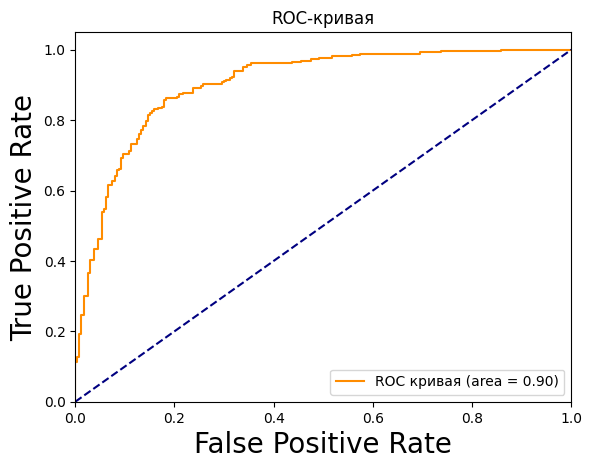

In [18]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
# генерируем датасет на 2 класса
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# разделяем его на 2 выборки
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# обучаем модель
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# получаем предказания
lr_probs = model.predict_proba(testX)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(testy, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(testy, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [19]:
import numpy as np 
def mean_squared_error(act, pred):

   diff = pred - act 
   differences_squared = diff ** 2 
   mean_diff = differences_squared.mean() 
   
   return mean_diff

act = np.array([1.1,2,1.7]) 
pred = np.array([1,1.7,1.5])

In [20]:
print(mean_squared_error(act,pred)) 

0.04666666666666667
